# ЗАДАНИЕ 1. ПЕРВИЧНЫЙ АНАЛИЗ ВРЕМЕННОГО РЯДА С ИСПОЛЬЗОВАНИЕМ ОПИСАТЕЛЬНЫХ СТАТИСТИК И ВИЗУАЛИЗАЦИИ

Проведите первичный анализ данных по ценам на материал 1 с использованием описательных статистик и визуализации, выявите неоднородность данных с помощью коэффициентов дифференциации и коэффициента фондов.

# Раздел 1. Загрузка данных и первичный анализ с использованием описательных статистик

In [1]:
!pip install --upgrade xlrd

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузим данные с помощью функции read_excel('data.xls', sheet_name='Material 1') из модуля pandas. Результат запишем в переменную data. Посмотрите на первые 5 наблюдений с помощью функции head().

In [48]:
data = pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


Поместим в переменную dates значения дат. Для этого с помощью метода loc укажем номер интересующей строки и с помощью метода values зададим координаты интересующих значений.

In [49]:
dates = data.loc[data.index == 0].values[0,2:]

Поместим в переменную val значения цен на материал 1 своего варианта. Для этого с помощью метода loc укажем номер интересующей строки и с помощью метода values зададим координаты интересующих значений.

In [50]:
val = data.loc[data.index == 54].values[0,2:]

Создадим на основе переменных dates и val словарь с кодами Date и Value и поместим его в переменную data. 

In [51]:
data = {'Date':dates, 'Value':val}

Создадим на основе переменной data таблицу данных с помощью функции DataFrame() из модуля pandas. Результат присвоим переменной df. Посмотрим первые 5 наблюдений с помощью функции head().

In [52]:
df = pd.DataFrame(data)
df.head()

,Date,Value
0,2007-01-01,26.94
1,2007-02-01,22.48
2,2007-03-01,28.16
3,2007-04-01,20.62
4,2007-05-01,24.81


Сделаем индексом столбец Date с помощью функции set_index('Date'). Результат присвоим переменной df. Посмотрим первые 10 наблюдений с помощью функции head().

In [53]:
df = df.set_index('Date')
df.head(10)

,Value
Date,
2007-01-01,26.94
2007-02-01,22.48
2007-03-01,28.16
2007-04-01,20.62
2007-05-01,24.81
2007-06-01,31.57
2007-07-01,31.94
2007-08-01,30.57
2007-09-01,25.93


Посмотрим на объем выборки с помощью атрибута size.

In [54]:
df.size

48

Выведем на экран общую информацию о содержимом df с помощью функции info().

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


Обратимся к значениям ряда Value и изменим их тип с помощью функции astype(float). Убедимся, что формат данных изменился с помощью функции info().

In [56]:
df.Value = df.Value.astype(float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


Выведем на экран данные за 2007 год в помесячной разбивке, обратившись к таблице данных по соответствующему индексу с помощью метода loc.

In [58]:
df.loc['2007']

,Value
Date,
2007-01-01,26.94
2007-02-01,22.48
2007-03-01,28.16
2007-04-01,20.62
2007-05-01,24.81
2007-06-01,31.57
2007-07-01,31.94
2007-08-01,30.57
2007-09-01,25.93


Установим точность вывода результатов до 2-х знаков после запятой с помощью функции set_option('precision', 2) из модуля pandas.

In [59]:
pd.set_option('display.precision', 2)

Выведем на экран описательные статистики, воспользовавшись функцией describe().

In [60]:
df.describe()

,Value
count,48.00
mean,40.91
std,11.06
min,20.62
25%,31.45
50%,41.82
75%,47.01
max,62.20


Рассчитаем коэффициенты дифференциации: 
Коэффициенты дифференциации – децильный (K_D), квартильный (K_Q) – показывают, во сколько раз нижняя граница 10% (25%) лучших превосходит верхнюю границу 10% (25%) худших значений измеряемого признака.
* K_D=D_9/D_1 
* K_Q=Q_3/Q_1 

Воспользуемся функцией quantile() для вычисления необходимых квантилей.


In [61]:
d1 = df.quantile(0.1)
d1

Value    27.51
Name: 0.1, dtype: float64

In [62]:
d9 = df.quantile(0.9)
d9

Value    57.11
Name: 0.9, dtype: float64

In [63]:
kd = d9 / d1
print(kd)

Value    2.08
dtype: float64


In [64]:
q1 = df.quantile(0.25)
print(q1)

Value    31.45
Name: 0.25, dtype: float64


In [65]:
q3 = df.quantile(0.75)
print(q3)

Value    47.01
Name: 0.75, dtype: float64


In [66]:
kq = q3 / q1
print(kq)

Value    1.49
dtype: float64


Рассчитаем коэффициент фондов.
Коэффициент фондов (K_F) – показывает, во сколько раз среднее самых больших значений (x ̅_2, рассчитанное по 10% верхнего диапазона) больше среднего самых малых значений (x ̅_1, рассчитанное по 10% нижнего диапазона).
* K_F=x ̅_2/x ̅_1 

In [67]:
array = df.values

In [68]:
X = array[:,0]
X

array([26.94, 22.48, 28.16, 20.62, 24.81, 31.57, 31.94, 30.57, 25.93,
       32.1 , 33.91, 30.08, 35.02, 34.39, 27.75, 28.99, 30.86, 40.07,
       40.81, 31.11, 42.25, 40.  , 35.64, 43.35, 37.49, 45.96, 43.01,
       46.07, 41.39, 42.71, 46.65, 43.93, 42.86, 48.1 , 43.03, 50.36,
       46.37, 55.39, 46.31, 57.11, 50.29, 58.92, 57.12, 61.03, 54.19,
       57.44, 62.2 , 56.21])

In [69]:
X.sort()
X

array([20.62, 22.48, 24.81, 25.93, 26.94, 27.75, 28.16, 28.99, 30.08,
       30.57, 30.86, 31.11, 31.57, 31.94, 32.1 , 33.91, 34.39, 35.02,
       35.64, 37.49, 40.  , 40.07, 40.81, 41.39, 42.25, 42.71, 42.86,
       43.01, 43.03, 43.35, 43.93, 45.96, 46.07, 46.31, 46.37, 46.65,
       48.1 , 50.29, 50.36, 54.19, 55.39, 56.21, 57.11, 57.12, 57.44,
       58.92, 61.03, 62.2 ])

In [70]:
firstsize = int(len(X)*0.1)
print(firstsize)

4


In [71]:
lastsize = int(len(X)*0.9)
print(lastsize)

43


In [72]:
first10 = X[0:firstsize]
first10

array([20.62, 22.48, 24.81, 25.93])

In [73]:
m1 = np.mean(first10)
print(m1)

23.46


In [74]:
last10 = X[lastsize:len(X)]
last10

array([57.12, 57.44, 58.92, 61.03, 62.2 ])

In [75]:
m2 = np.mean(last10)
print(m2)

59.342000000000006


In [76]:
kf = m2 / m1
print(kf)

2.5294970161977837


# Раздел 2. Первичный анализ данных с использованием визуализации

Построим линейный график, воспользовавшись функцией plot() и функцией show() из модуля matplotlib.pyplot.

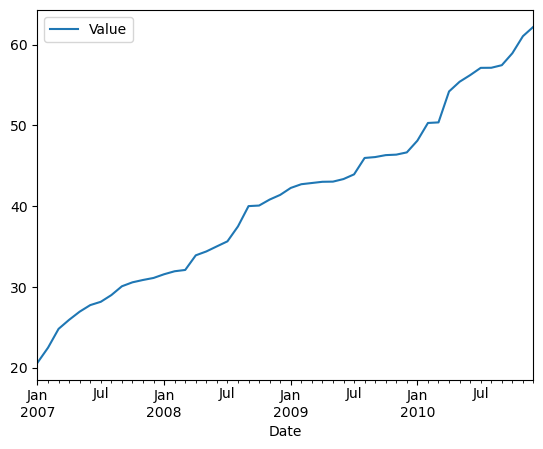

In [77]:
df.plot()
plt.show()

Изменим стиль графика, задав функцию plot(style='k.'), чтобы получить точечный график, и функцию plot(style='k--'), чтобы получить пунктирную линию.

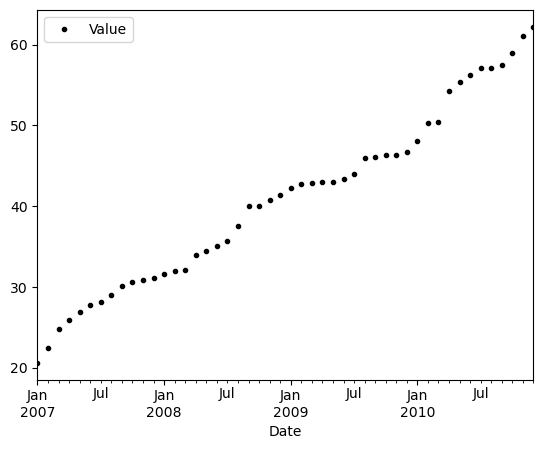

In [78]:
df.plot(style='k.')
plt.show()

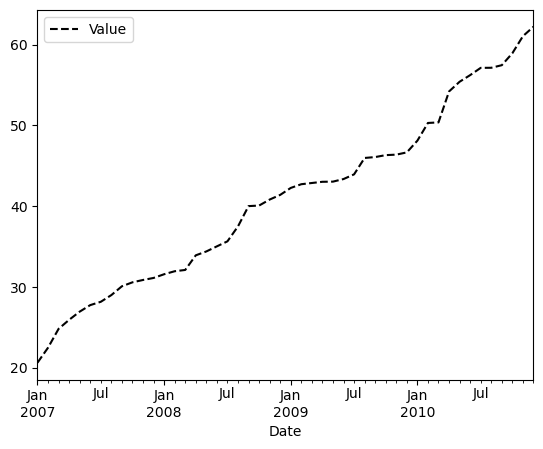

In [79]:
df.plot(style='k--')
plt.show()

Превратим объект DataFrame в переменной df в объект Series с помощью функции squeeze(). Результат запишем в переменную series.

In [80]:
ser = df.squeeze()
type(ser)

pandas.core.series.Series

Построим сгруппированные по годам линейные графики. Это потребует выполнения следующих действий:
* Убедиться в том, что мы работаем с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze().
* Импортировать функции DataFrame и Grouper из модуля pandas.
* Сгруппировать временной ряд по годам с помощью функции groupby(Grouper(freq='A')) и поместить результат в переменную groups.
* Создать пустую таблицу данных с помощью функции DataFrame() и поместить результат в переменную years.
* С помощью команды for, перебирая период (name) и данные (group), содержащиеся в переменной groups, создать в таблице данных years столбцы для каждого года (name.year), заполненные соответствующими данными о ценах на материал 1 (group.values).
* Построить линейные графики друг под другом для всех годов, воспользовавшись функцией plot(subplots=True, legend=True) и функцией show() из модуля matplotlib.pyplot. Настроить график можно с помощью модуля matplotlib.

In [81]:
groups = ser.groupby(pd.Grouper(freq='A'))

In [82]:
years = pd.DataFrame()

In [83]:
for name, group in groups:
  years[name.year] = group.values

In [84]:
years

,2007,2008,2009,2010
0,20.62,31.57,42.25,48.10
1,22.48,31.94,42.71,50.29
2,24.81,32.10,42.86,50.36
3,25.93,33.91,43.01,54.19
4,26.94,34.39,43.03,55.39
5,27.75,35.02,43.35,56.21
6,28.16,35.64,43.93,57.11
7,28.99,37.49,45.96,57.12
8,30.08,40.00,46.07,57.44
9,30.57,40.07,46.31,58.92


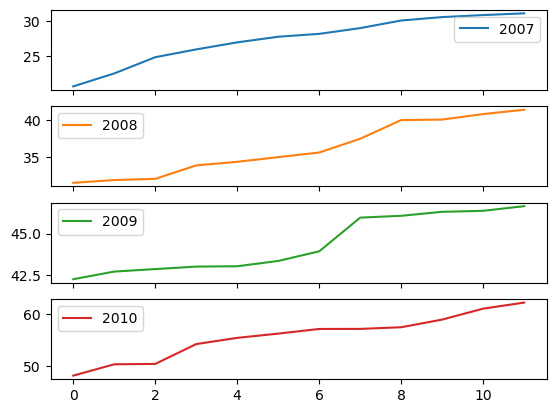

In [85]:
years.plot(subplots=True, legend=True)
plt.show()

Построим гистограмму для временного ряда, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot.

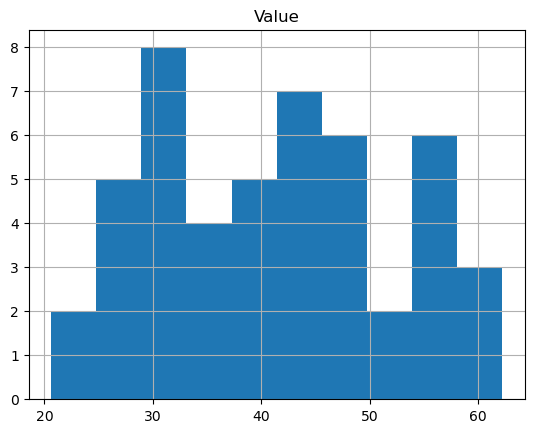

In [86]:
df.hist()
plt.show()

Построим ядерную функцию плотности, воспользовавшись функцией plot(kind='kde') и функцией show() из модуля matplotlib.pyplot.

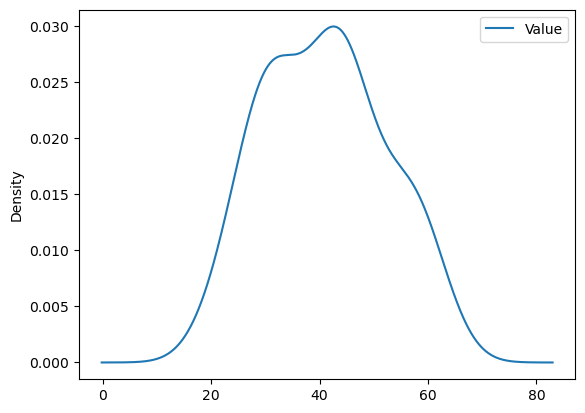

In [87]:
df.plot(kind='kde')
plt.show()

Построим ящики с усами с разбивкой по годам, воспользовавшись функцией boxplot(), примененной к содержимому переменной years, и функцией show() из модуля matplotlib.pyplot.

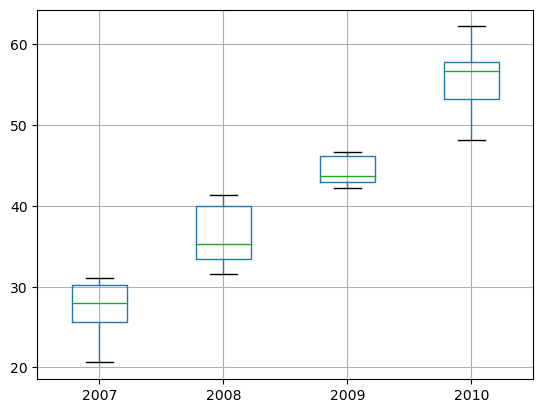

In [88]:
years.boxplot()
plt.show()

Построим тепловую карту с разбивкой по годам, воспользовавшись функцией matshow(years.T, interpolation=None, aspect='auto') из модуля matplotlib.pyplot, примененной к транспонированному содержимому переменной years, и функцией show() из модуля matplotlib.pyplot.

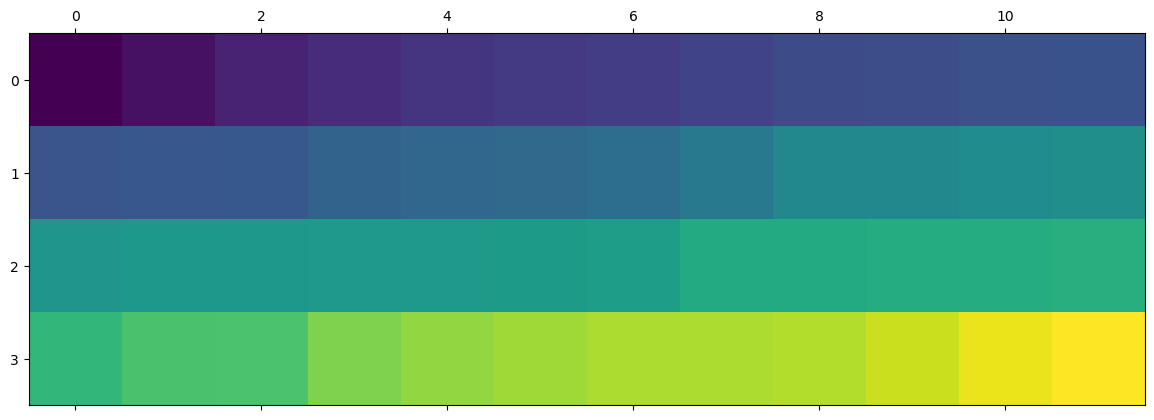

In [89]:
plt.matshow(years.T, interpolation=None, aspect='auto')
plt.show()